# Predicting the Stock Market Using Machine Learning 
### Amber Cornelious 

In this project I will predict the stock market using machine learning. I'll be working with the `S&P 500` data provided by the Python package `yfinance`, an [open-source tool](https://pypi.org/project/yfinance/) that uses publicly available APIs to download market data from [Yahoo!Ⓡ finance](https://finance.yahoo.com/). 

The data is comprised of the following columns: 

* `Open`: Indicates the price when the market opened.
* `High`: Highest price during the day.
* `Low`: Lowest price during the day.
* `Close`: Indicates the price when the exchange closed.
* `Volume`: Indicates the total number of shares traded.


In [2]:
import yfinance as yf
import pandas as pd
import os

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,0.0,0.0
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,0.0,0.0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,0.0,0.0


We'll use the columns `Open`, `High`, `Low`, and `Close` to predict if the stock price will go up or down tomorrow. 

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-12-23 00:00:00-05:00', '2022-12-27 00:00:00-05:00',
               '2022-12-28 00:00:00-05:00', '2022-12-29 00:00:00-05:00',
               '2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00',
               '2023-01-04 00:00:00-05:00', '2023-01-05 00:00:00-05:00',
               '2023-01-06 00:00:00-05:00', '2023-01-09 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23870, freq=None)

## Cleaning and Visualizing the Stock Market Data

There are some additional columns in the `sp500` DataFrame, `Dividends` and `Stock Splits` that aren't useful for the end goal, so I will remove them from the DataFrame. 

<AxesSubplot:xlabel='Date'>

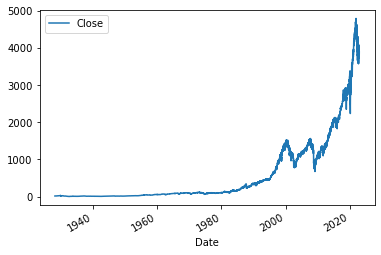

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## Setting Up the Target Column 

The target column is the column we're going to be predicting using machine learning.

All data from before 1990 will also have to be removed due to potential market condition shifts in the past that wouldn't be helpful for future predicitions. 

The goal isn't to be accurate on the absolute price of the stuck, but instead the directionaltiy of the stock, whether or not the price will go up or down.

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1


In [14]:
sp500 = sp500.loc["1990-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0
2023-01-05 00:00:00-05:00,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,3895.080078,1


## Training an Initial Machine Learning Model

For the initial model, I'll use `RandomForestClassifier` because it can pick up non-linear relationships

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [19]:
import pandas as pd 

preds = pd.Series(preds, index=test.index)

In [20]:
preds

Date
2022-08-17 00:00:00-04:00    1
2022-08-18 00:00:00-04:00    1
2022-08-19 00:00:00-04:00    1
2022-08-22 00:00:00-04:00    0
2022-08-23 00:00:00-04:00    0
                            ..
2023-01-03 00:00:00-05:00    0
2023-01-04 00:00:00-05:00    1
2023-01-05 00:00:00-05:00    1
2023-01-06 00:00:00-05:00    0
2023-01-09 00:00:00-05:00    1
Length: 100, dtype: int64

In [21]:
precision_score(test["Target"], preds)

0.3424657534246575

In [22]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

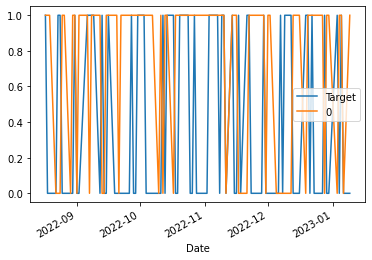

In [23]:
combined.plot()

## Building a Backtesting System



In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [38]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [39]:
predictions = backtest(sp500, model, predictors)

In [40]:
predictions["Predictions"].value_counts()

0    3388
1    2432
Name: Predictions, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5275493421052632

In [43]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533849
0    0.466151
Name: Target, dtype: float64

## Adding Additional Predictors to the Model

I'll add some additional predictors to the model to improve its accuracy. Rolling averages, mean close price of the last two days, five days, three months, year and 4 years. 

In [45]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons: 
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [55]:
sp500 = sp500.dropna() #cleaning up dataframe to exclude NaN values, this drops roughly four years of data from sp500

In [48]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,2979870000,3824.139893,0,0.998728,1.0,1.002686,2.0,0.995456,24.0,0.937441,107.0,1.056691,540.0
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1,0.997996,0.0,0.999755,1.0,0.991132,24.0,0.934576,107.0,1.052104,540.0
2023-01-04 00:00:00-05:00,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,3808.100098,0,1.003755,1.0,1.006044,2.0,0.997685,25.0,0.942403,108.0,1.059674,540.0


## Improving the Model

The prediction function can be altered in order to improve the model and our confidence in the model. I will use the `predict_proba` method, to return the probability that the row will be a `0` or a `1`. Then I will create a custom threshold (60%)  to determine whether the prediction will be `0` or `1`.

In [49]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [50]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]#returns a probability 
    preds[preds >= .6] = 1
    preds [preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [51]:
predictions = backtest(sp500, model, new_predictors)

In [52]:
predictions["Predictions"].value_counts()

0.0    4006
1.0     813
Name: Predictions, dtype: int64

In [54]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

## In Conclusion

I downloaded stock data for the S&P 500 index, cleaned and visuzalized the data. A machine learning target was established along with an initial model. Following evaluations of errors a backtest system was created in order to measure the errors over long periods. Additional predictor columns were added to improve the model. While the model is not a incredibly accurate and should not be used in conjunction with real life stock trading, it has some predictive value. 

Following further tweaks of the model the project can be extended and improved. 